# **One Particular Solution to $A\mathbf{x}_p = \mathbf{b}$**

### **Definition**

> When solving a system of linear equations of the form:

$$
A\mathbf{x} = \mathbf{b}
$$

The **complete solution** can be expressed as:

$$
\mathbf{x} = \mathbf{x}_p + \mathbf{x}_n
$$

Where:
- $\mathbf{x}_p$ is **one particular solution** that satisfies $A\mathbf{x}_p = \mathbf{b}$
- $\mathbf{x}_n$ is any solution to the **homogeneous system** $A\mathbf{x}_n = \mathbf{0}$ (i.e., a vector in the nullspace of $A$)


### **Why Find a Particular Solution?**

A particular solution:
- Is **not unique** (you can add any nullspace vector to it and still get a valid solution)
- Serves as a **base point** — all other solutions are just shifts of this point by nullspace vectors


### **How to Find $\mathbf{x}_p$**

1. Form the **augmented matrix** $[A \mid \mathbf{b}]$
2. Perform **row reduction** (e.g., RREF)
3. Solve for pivot variables using back-substitution
4. Assign any values to free variables (if needed)

The result is one specific solution $\mathbf{x}_p$, from which all solutions can be derived.


### **Code Implementation**

In [4]:
import numpy as np
from sympy import Matrix

# Define matrix A and vector b
A = Matrix([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
b = Matrix([6, 15, 24])

# Augmented matrix [A | b]
Ab = A.row_join(b)

# Reduce to RREF
rref_matrix, pivots = Ab.rref()

# Check consistency
last_col = rref_matrix[:, -1]  # Extract last column (b part)
n_rows = A.rows

# Check for rows [0 0 ... 0 | non-zero]
for r in range(n_rows):
    # If all coefficients in row are zero but constant term is non-zero
    if rref_matrix[r, :-1].is_zero_matrix and last_col[r] != 0:
        print("System is inconsistent - no solution exists!")
        break
else:
    # Initialize particular solution vector (3x1 zero vector)
    x_p = Matrix.zeros(A.cols, 1)

    # Fill in pivot values (leading variables)
    for i, p_col in enumerate(pivots):
        x_p[p_col] = last_col[i]  # Use last_col instead of rref_matrix[i, -1]

    print("A:")
    display(A)
    print("b:")
    display(b)
    print("One Particular Solution to Ax = b:")
    display(x_p)

A:


Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

b:


Matrix([
[ 6],
[15],
[24]])

One Particular Solution to Ax = b:


Matrix([
[0],
[3],
[0]])

### **Visualization**

<>:37: SyntaxWarning: invalid escape sequence '\c'
<>:61: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\c'
<>:61: SyntaxWarning: invalid escape sequence '\m'
C:\Users\PC\AppData\Local\Temp\ipykernel_4604\211593301.py:37: SyntaxWarning: invalid escape sequence '\c'
  ax.plot(x_line, y_line, z_line, 'b-', linewidth=2, label='Solution Space: $x_p + t \cdot v$')
C:\Users\PC\AppData\Local\Temp\ipykernel_4604\211593301.py:61: SyntaxWarning: invalid escape sequence '\m'
  ax.set_title('Solution of $A\mathbf{x} = \mathbf{b}$: Line of Solutions', fontsize=14)


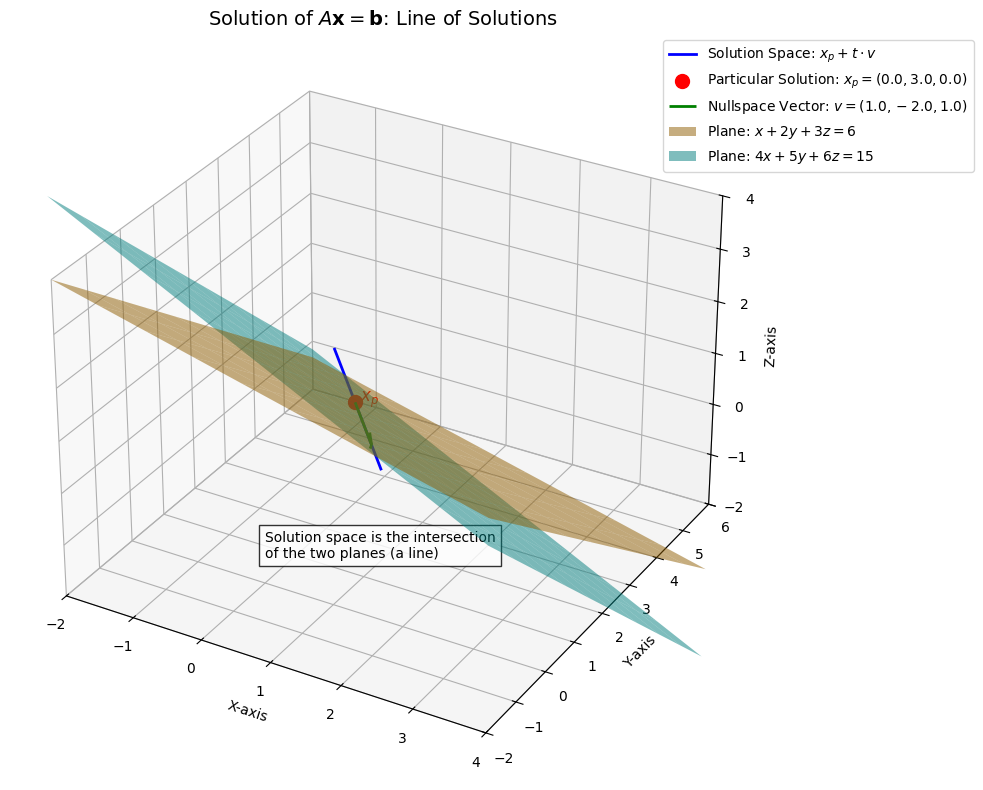

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import Matrix

# Define matrix A and vector b
A = Matrix([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
b = Matrix([6, 15, 24])

# Compute solution components
Ab = A.row_join(b)
rref_matrix, pivots = Ab.rref()
x_p = Matrix.zeros(A.cols, 1)  # Particular solution
for i, p_col in enumerate(pivots):
    x_p[p_col] = rref_matrix[i, -1]
nullspace = A.nullspace()

# Convert to NumPy arrays for visualization
x_p = np.array(x_p).astype(np.float64).flatten()
v = np.array(nullspace[0]).astype(np.float64).flatten()

# Create parameter range for solution line
t = np.linspace(-3, 3, 50)
x_line = x_p[0] + t * v[0]
y_line = x_p[1] + t * v[1]
z_line = x_p[2] + t * v[2]

# Create figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot solution line
ax.plot(x_line, y_line, z_line, 'b-', linewidth=2, label='Solution Space: $x_p + t \cdot v$')

# Plot particular solution
ax.scatter(*x_p, color='r', s=100, label=f'Particular Solution: $x_p = ({x_p[0]},{x_p[1]},{x_p[2]})$')

# Plot nullspace vector
ax.quiver(*x_p, *v, color='g', length=2, arrow_length_ratio=0.1, 
          linewidth=2, label=f'Nullspace Vector: $v = ({v[0]:.1f},{v[1]:.1f},{v[2]:.1f})$')

# Create planes for the equations
x_plane, y_plane = np.meshgrid(np.linspace(-2, 4, 10), np.linspace(-2, 6, 10))

# Plane 1: x + 2y + 3z = 6
z_plane1 = (6 - 1*x_plane - 2*y_plane) / 3
ax.plot_surface(x_plane, y_plane, z_plane1, alpha=0.5, color='orange', label='Plane: $x + 2y + 3z = 6$')

# Plane 2: 4x + 5y + 6z = 15
z_plane2 = (15 - 4*x_plane - 5*y_plane) / 6
ax.plot_surface(x_plane, y_plane, z_plane2, alpha=0.5, color='cyan', label='Plane: $4x + 5y + 6z = 15$')

# Configuration
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Solution of $A\mathbf{x} = \mathbf{b}$: Line of Solutions', fontsize=14)
ax.set_xlim([-2, 4])
ax.set_ylim([-2, 6])
ax.set_zlim([-2, 4])
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add text annotations
ax.text(x_p[0], x_p[1], x_p[2], " $x_p$", color='red', fontsize=12)
ax.text(0, 0, -1.5, "Solution space is the intersection\nof the two planes (a line)", 
        fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()